카테고리형 변수 Target Encoding + Q_E/Q_A 변수 40개 제거 후,
alpha=1일 때 test data에 대한 정확도가 높음
(train ridge score : 0.684
test ridge score : 0.683
confusion_matrix : [[2944 1643]
 [1006 2774]]
recall : 0.7338624338624339
precision : 0.6280280733529545
accuracy : 0.6833990677662245)

In [ ]:
pip install category_encoders

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn.model_selection
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import RidgeClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score
import category_encoders as ce

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [61]:
train = pd.read_excel('train_preprocessing.xlsx')

In [62]:
ohe = OneHotEncoder(sparse=False)
train['voted'] = ohe.fit_transform(train[['voted']])
train['voted'] = train['voted'].astype(int)
train['voted']

0        0
1        0
2        1
3        1
4        1
        ..
41828    0
41829    0
41830    1
41831    1
41832    1
Name: voted, Length: 41833, dtype: int64

In [63]:
y=train['voted']
X=train.drop(['Unnamed: 0', 'voted'], axis=1)

In [64]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
   X, y, random_state=42, test_size=0.2
)

# Label Encoding

In [23]:
label = LabelEncoder()
x_train['gender_code'] = label.fit_transform(x_train['gender'])
x_train['age_group_code'] = label.fit_transform(x_train['age_group'])
x_train['race_code'] = label.fit_transform(x_train['race'])
x_train['religion_code'] = label.fit_transform(x_train['religion'])

x_test['gender_code'] = label.fit_transform(x_test['gender'])
x_test['age_group_code'] = label.fit_transform(x_test['age_group'])
x_test['race_code'] = label.fit_transform(x_test['race'])
x_test['religion_code'] = label.fit_transform(x_test['religion'])

drop2 = ['gender','age_group','race','religion']
x_train = x_train.drop(drop2, axis = 1)
x_test = x_test.drop(drop2, axis = 1)

## alpha = 1e-15, 0.676, 0.670

In [26]:
model = RidgeClassifier()
parameters = {'alpha':[1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}
ridge = GridSearchCV(model, parameters, scoring='f1',cv=5)
results = ridge.fit(x_train, y_train)
print('Config: %s' % results.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.75521e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.64395e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.45447e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.43671e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-condit

Config: {'alpha': 1e-15}


In [28]:
best_model = RidgeClassifier(alpha=1e-15)
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

print('train ridge score : {:.3f}'.format(best_model.score(x_train, y_train)))
print('test ridge score : {:.3f}'.format(best_model.score(x_test, y_test)))
print('confusion_matrix : {}'.format(confusion_matrix(y_test, y_pred)))
print('recall : {}'.format(recall_score(y_test, y_pred)))
print('precision : {}'.format(precision_score(y_test, y_pred)))
print('accuracy : {}'.format(accuracy_score(y_test, y_pred)))

train ridge score : 0.676
test ridge score : 0.670
confusion_matrix : [[3336 1251]
 [1512 2268]]
recall : 0.6
precision : 0.6445012787723785
accuracy : 0.669774112585156


## Q_E, Q_A 제외한 후

In [29]:
X=X.drop(X.columns[0:40],axis=1)

In [30]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
   X, y, random_state=42, test_size=0.2
)

In [31]:
label = LabelEncoder()
x_train['gender_code'] = label.fit_transform(x_train['gender'])
x_train['age_group_code'] = label.fit_transform(x_train['age_group'])
x_train['race_code'] = label.fit_transform(x_train['race'])
x_train['religion_code'] = label.fit_transform(x_train['religion'])

x_test['gender_code'] = label.fit_transform(x_test['gender'])
x_test['age_group_code'] = label.fit_transform(x_test['age_group'])
x_test['race_code'] = label.fit_transform(x_test['race'])
x_test['religion_code'] = label.fit_transform(x_test['religion'])

drop2 = ['gender','age_group','race','religion']
x_train = x_train.drop(drop2, axis = 1)
x_test = x_test.drop(drop2, axis = 1)

## alpha = 5, 0.674, 0.668

In [35]:
model = RidgeClassifier()
parameters = {'alpha':[1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}
ridge = GridSearchCV(model, parameters, scoring='f1',cv=5)
results = ridge.fit(x_train, y_train)
print('Config: %s' % results.best_params_)

Config: {'alpha': 5}


In [36]:
ridge = RidgeClassifier(alpha=5)
ridge.fit(x_train, y_train)
y_pred = ridge.predict(x_test)

print('train ridge score : {:.3f}'.format(ridge.score(x_train, y_train)))
print('test ridge score : {:.3f}'.format(ridge.score(x_test, y_test)))
print('confusion_matrix : {}'.format(confusion_matrix(y_test, y_pred)))
print('recall : {}'.format(recall_score(y_test, y_pred)))
print('precision : {}'.format(precision_score(y_test, y_pred)))
print('accuracy : {}'.format(accuracy_score(y_test, y_pred)))

train ridge score : 0.674
test ridge score : 0.668
confusion_matrix : [[3338 1249]
 [1526 2254]]
recall : 0.5962962962962963
precision : 0.6434484727376535
accuracy : 0.6683399067766225


# Target Encoding

In [65]:
def target_encoder(data, col) :
  encoder = ce.target_encoder.TargetEncoder(cols=[col])
  encoder.fit(data[col], data['voted']);
  data[col + '_code'] = encoder.transform(data[col])
  data[col + '_code'] = data[col + '_code'].round()
  data = data.drop([col], axis = 1)
  return data

train = target_encoder(train, 'gender')
train = target_encoder(train, 'age_group')
train = target_encoder(train, 'race')
train = target_encoder(train, 'religion')

/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [66]:
y=train['voted']
X=train.drop(['Unnamed: 0', 'voted'], axis=1)

In [67]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
   X, y, random_state=42, test_size=0.2
)

## alpha = 1e-15, 0.685, 0.684

In [40]:
model = RidgeClassifier()
parameters = {'alpha':[1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}
ridge = GridSearchCV(model, parameters, scoring='f1',cv=5)
results = ridge.fit(x_train, y_train)
print('Config: %s' % results.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=8.71401e-32): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.64395e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.63926e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=8.71109e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-condit

Config: {'alpha': 1e-15}


In [68]:
ridge = RidgeClassifier(alpha=1e-15)
ridge.fit(x_train, y_train)
y_pred = ridge.predict(x_test)

print('train ridge score : {:.3f}'.format(ridge.score(x_train, y_train)))
print('test ridge score : {:.3f}'.format(ridge.score(x_test, y_test)))
print('confusion_matrix : {}'.format(confusion_matrix(y_test, y_pred)))
print('recall : {}'.format(recall_score(y_test, y_pred)))
print('precision : {}'.format(precision_score(y_test, y_pred)))
print('accuracy : {}'.format(accuracy_score(y_test, y_pred)))

train ridge score : 0.685
test ridge score : 0.684
confusion_matrix : [[2957 1630]
 [1011 2769]]
recall : 0.7325396825396825
precision : 0.6294612411911799
accuracy : 0.6843552049719135


## Q_E, Q_A 제외한 후

In [72]:
x_train=x_train.drop(x_train.columns[0:40],axis=1)
x_test=x_test.drop(x_test.columns[0:40],axis=1)

## alpha = 1, 0.684, 0.683

In [43]:
model = RidgeClassifier()
parameters = {'alpha':[1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}
ridge = GridSearchCV(model, parameters, scoring='f1',cv=5)
results = ridge.fit(x_train, y_train)
print('Config: %s' % results.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.4921e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.50008e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.46779e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.4673e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditio

Config: {'alpha': 1}


In [73]:
ridge = RidgeClassifier(alpha=1)
ridge.fit(x_train, y_train)
y_pred = ridge.predict(x_test)

print('train ridge score : {:.3f}'.format(ridge.score(x_train, y_train)))
print('test ridge score : {:.3f}'.format(ridge.score(x_test, y_test)))
print('confusion_matrix : {}'.format(confusion_matrix(y_test, y_pred)))
print('recall : {}'.format(recall_score(y_test, y_pred)))
print('precision : {}'.format(precision_score(y_test, y_pred)))
print('accuracy : {}'.format(accuracy_score(y_test, y_pred)))

train ridge score : 0.684
test ridge score : 0.683
confusion_matrix : [[2944 1643]
 [1006 2774]]
recall : 0.7338624338624339
precision : 0.6280280733529545
accuracy : 0.6833990677662245


In [74]:
fi = pd.DataFrame({
    'feature' : x_train.columns,
    'feature importance' : ridge.coef_[0]
})
fi['feature importance'] = fi['feature importance'] * 100
fi = fi.sort_values('feature importance') # age_group, QtE, QiE, QsE, QdE, education, QfE, QgE, QbE, QkE
fi

,feature,feature importance
20,wr_02,-5.418754
26,wr_08,-3.169179
15,urban,-2.933429
30,wr_12,-2.280635
32,Mach_score,-2.217748
21,wr_03,-2.150684
11,tp07,-1.962443
1,engnat,-1.672051
13,tp09,-1.541663
6,tp02,-1.260327


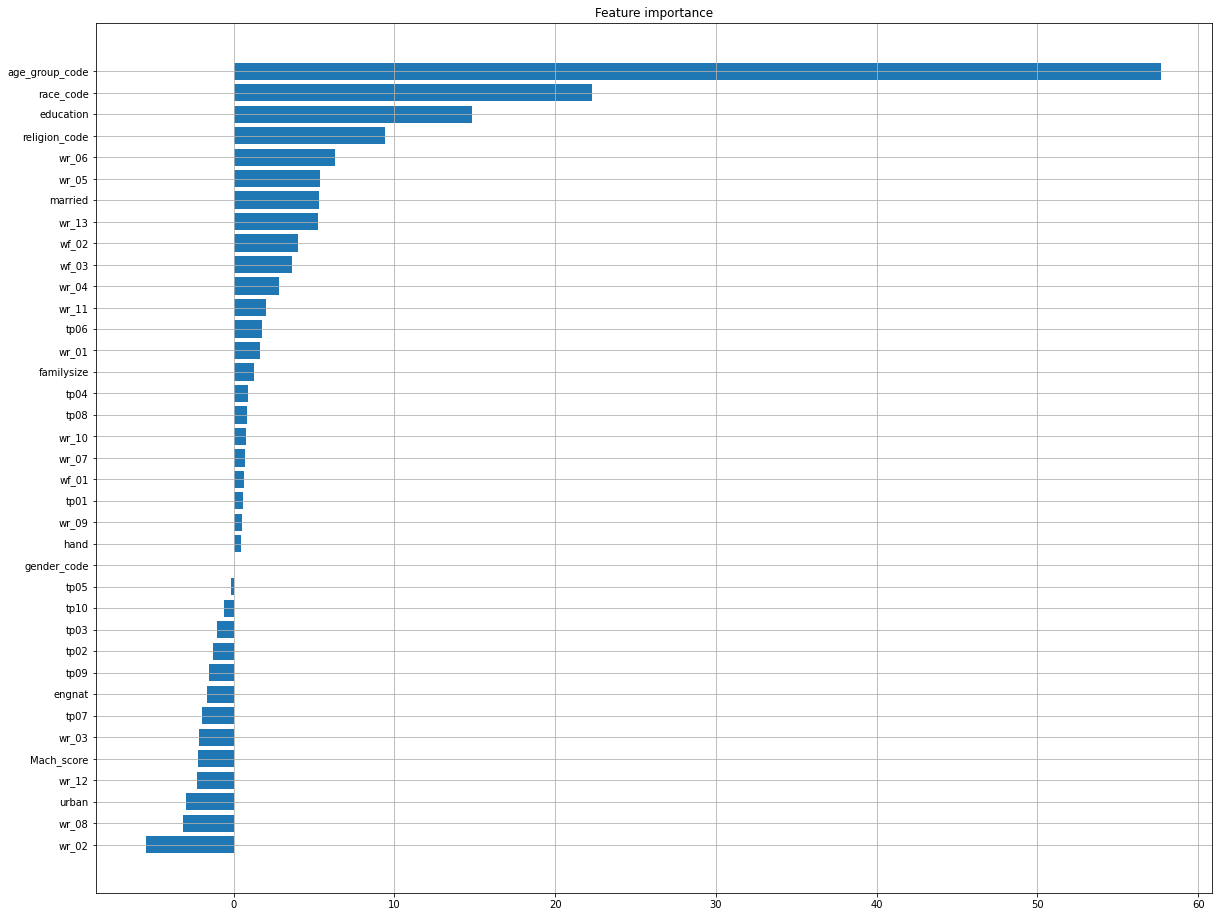

In [75]:
plt.figure(figsize=(20,16))
plt.barh(fi['feature'], fi['feature importance'])
plt.title('Feature importance')
ax = plt.gca()
ax.xaxis.grid(True)
ax.yaxis.grid(True)
plt.show()